In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [7]:
#Checking in dataset about how much weightage of null value present in each coloums 
#print(len(df.index))
round(df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
                ... 
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
Id              0.00
Length: 81, dtype: float64

# Data Cleaning

In [8]:
#will try to drop those coloums which are having more then 10% null values
round(df.isnull().sum()/len(df.index),2).sort_values(ascending = False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

In [9]:
#PoolQC          1.00
#MiscFeature     0.96
#Alley           0.94
#Fence           0.81
#FireplaceQu     0.47
#LotFrontage     0.18

#above ones have more then 10% missing values so let's drop them
df.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis='columns',inplace =True)

In [10]:
df.shape

(1460, 75)

In [11]:
#Now, let check the columns which has null values in more then 0 and less then 10%
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values > 0.00].sort_values(ascending = False).head(20)


GarageCond      0.06
GarageQual      0.06
GarageFinish    0.06
GarageYrBlt     0.06
GarageType      0.06
BsmtFinType2    0.03
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [12]:
#Before we imput the missing values, we notice in null values colums b/w 0 to 10% that GarageYrBlt is having null values 
#0.06%. We might have to remove that columns after we do calculate how old the houses are, how many years since garage build


#So, let's first create new feature variable based on current columns

df['house_years']    = df.YearBuilt.max()-df.YearBuilt
df['remodel_years']  = df.YearRemodAdd.max()-df.YearRemodAdd
df['sold_years']     = df.YrSold.max()-df.YrSold
df['garage_years']   = df.GarageYrBlt.max()-df.GarageYrBlt

df[['YearBuilt','house_years','YearRemodAdd','remodel_years','YrSold','sold_years','GarageYrBlt','GarageYrBlt']].head(10)

,YearBuilt,house_years,YearRemodAdd,remodel_years,YrSold,sold_years,GarageYrBlt,GarageYrBlt
0,2003,7,2003,7,2008,2,2003.0,2003.0
1,1976,34,1976,34,2007,3,1976.0,1976.0
2,2001,9,2002,8,2008,2,2001.0,2001.0
3,1915,95,1970,40,2006,4,1998.0,1998.0
4,2000,10,2000,10,2008,2,2000.0,2000.0
5,1993,17,1995,15,2009,1,1993.0,1993.0
6,2004,6,2005,5,2007,3,2004.0,2004.0
7,1973,37,1973,37,2009,1,1973.0,1973.0
8,1931,79,1950,60,2008,2,1931.0,1931.0
9,1939,71,1950,60,2008,2,1939.0,1939.0


In [13]:
#Let's drop the original columns
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis='columns', inplace= True)

In [14]:
df.shape

(1460, 75)

In [15]:
#Again let's check missing values b/w 0 to 10% range
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values > 0.00].sort_values(ascending = False)

garage_years    0.06
GarageCond      0.06
GarageQual      0.06
GarageFinish    0.06
GarageType      0.06
BsmtFinType2    0.03
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [16]:
#let's imput above all the columns, in order to imput them, we need to imput by most frequently occured on each columns

In [17]:
missvalue_cols = df.isna().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False).values>0]
print(missvalue_cols)

garage_years    81
GarageCond      81
GarageType      81
GarageQual      81
GarageFinish    81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64


In [18]:
garage_years_freqmax = df['garage_years'].value_counts().sort_values(ascending = False).index[0]
print('garage_years-->',garage_years_freqmax)

GarageCond_freqmax = df['GarageCond'].value_counts().sort_values(ascending = False).index[0]
print('GarageCond-->',GarageCond_freqmax)

GarageType_freqmax = df['GarageType'].value_counts().sort_values(ascending = False).index[0]
print('GarageType-->',GarageType_freqmax)

GarageQual_freqmax = df['GarageQual'].value_counts().sort_values(ascending = False).index[0]
print('GarageQual-->',GarageQual_freqmax)

GarageFinish_freqmax = df['GarageFinish'].value_counts().sort_values(ascending = False).index[0]
print('GarageFinish-->',GarageFinish_freqmax)

BsmtFinType2_freqmax = df['BsmtFinType2'].value_counts().sort_values(ascending = False).index[0]
print('BsmtFinType2-->',BsmtFinType2_freqmax)

BsmtExposure_freqmax = df['BsmtExposure'].value_counts().sort_values(ascending = False).index[0]
print('BsmtExposure-->',BsmtExposure_freqmax)

BsmtCond_freqmax = df['BsmtCond'].value_counts().sort_values(ascending = False).index[0]
print('BsmtCond-->',BsmtCond_freqmax)

BsmtFinType1_freqmax = df['BsmtFinType1'].value_counts().sort_values(ascending = False).index[0]
print('BsmtFinType1-->',BsmtFinType1_freqmax)

BsmtQual_freqmax = df['BsmtQual'].value_counts().sort_values(ascending = False).index[0]
print('BsmtQual-->',BsmtQual_freqmax)

MasVnrType_freqmax = df['MasVnrType'].value_counts().sort_values(ascending = False).index[0]
print('MasVnrType-->',MasVnrType_freqmax)

MasVnrArea_freqmax = df['MasVnrArea'].value_counts().sort_values(ascending = False).index[0]
print('MasVnrArea-->',MasVnrArea_freqmax)

Electrical_freqmax = df['Electrical'].value_counts().sort_values(ascending = False).index[0]
print('Electrical-->',Electrical_freqmax)

garage_years--> 5.0
GarageCond--> TA
GarageType--> Attchd
GarageQual--> TA
GarageFinish--> Unf
BsmtFinType2--> Unf
BsmtExposure--> No
BsmtCond--> TA
BsmtFinType1--> Unf
BsmtQual--> TA
MasVnrType--> None
MasVnrArea--> 0.0
Electrical--> SBrkr


In [19]:
#imput missing values
#garage years, we will imput with -1/0 which is invalid data
df.garage_years.fillna( -1, inplace=True)
df.GarageCond.fillna( 'TA', inplace=True)
df.GarageType.fillna( 'Attchd', inplace=True)
df.GarageQual.fillna( 'TA', inplace=True)
df.GarageFinish.fillna( 'Unf', inplace=True)
df.BsmtFinType2.fillna( 'Unf', inplace=True)
df.BsmtExposure.fillna( 'No', inplace=True)
df.BsmtCond.fillna( 'TA', inplace=True)
df.BsmtFinType1.fillna( 'Unf', inplace=True)
df.BsmtQual.fillna( 'TA', inplace=True)
df.MasVnrType.fillna( 'None', inplace=True)
df.MasVnrArea.fillna( df.MasVnrArea.median(), inplace=True)
df.Electrical.fillna( 'SBrkr', inplace=True)

In [20]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
#Drop ID, since it is of no use
df.drop(['Id'],axis='columns',inplace=True)

In [22]:
df.shape

(1460, 74)

# EDA

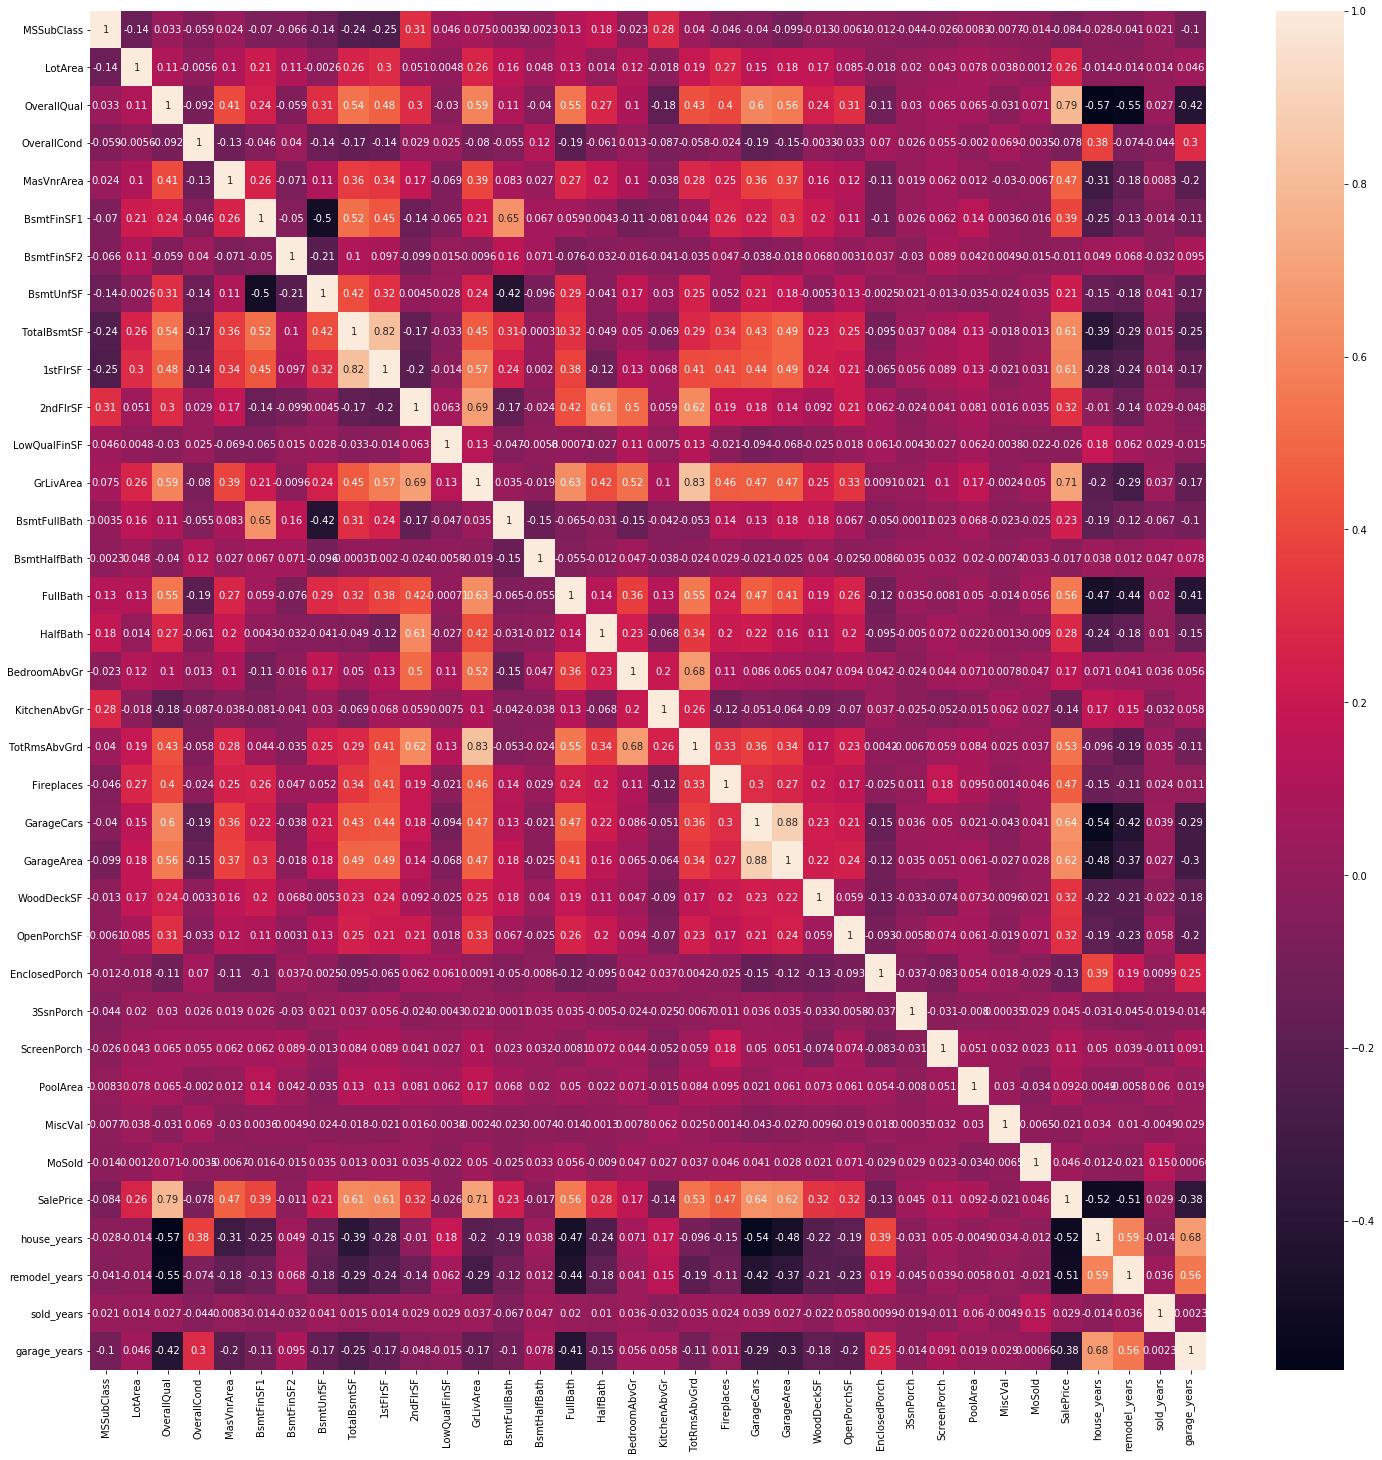

In [23]:
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

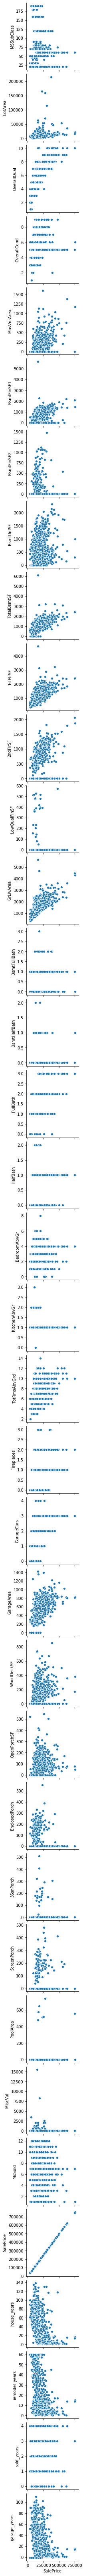

In [24]:
sns.pairplot(data=df,x_vars=['SalePrice'],y_vars=list(df.dtypes[df.dtypes != 'object'].index))
plt.show()

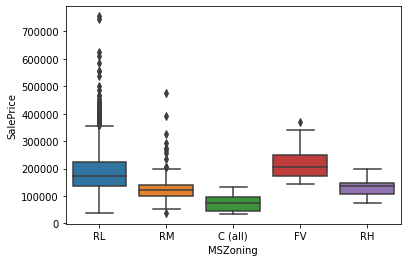

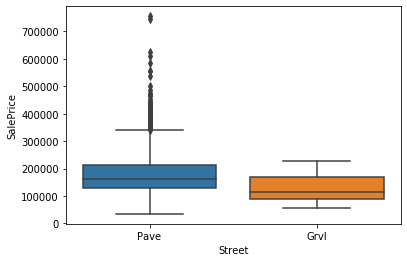

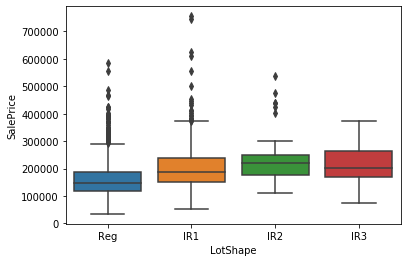

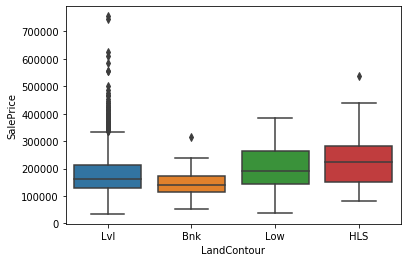

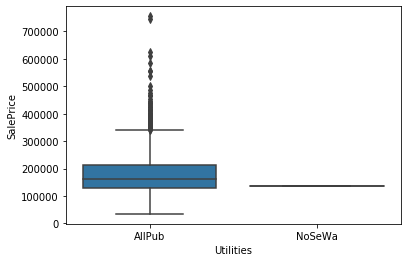

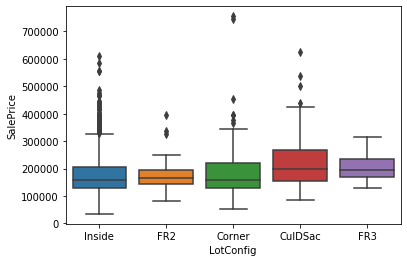

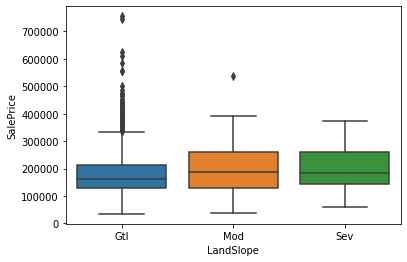

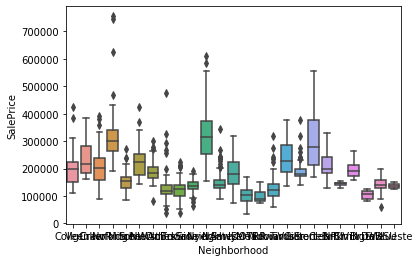

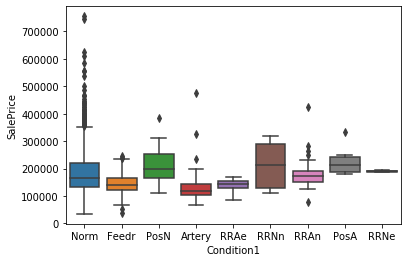

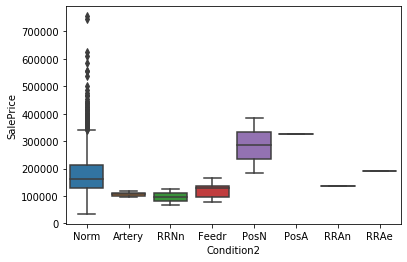

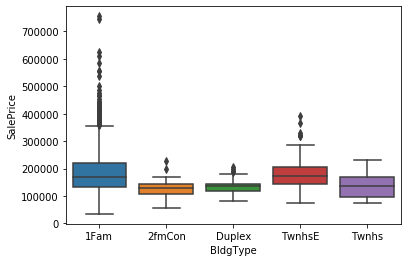

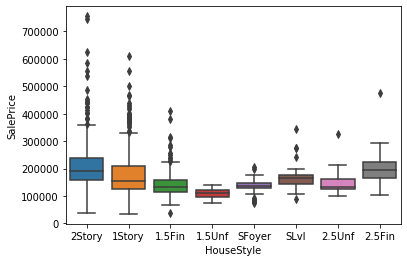

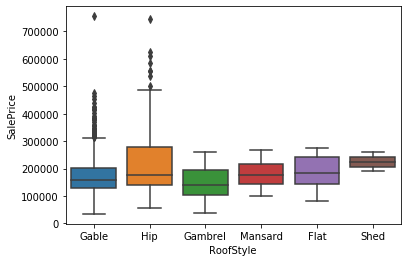

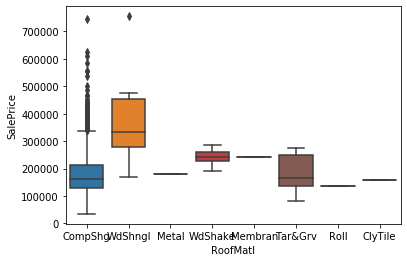

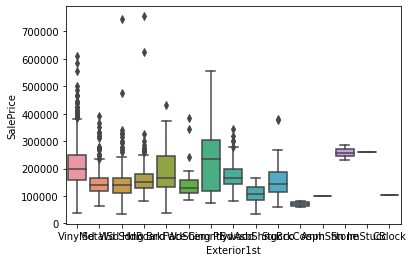

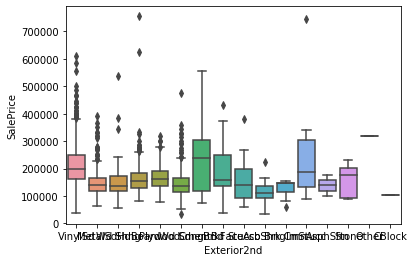

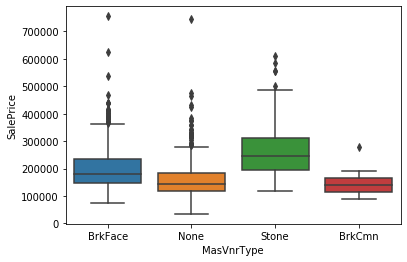

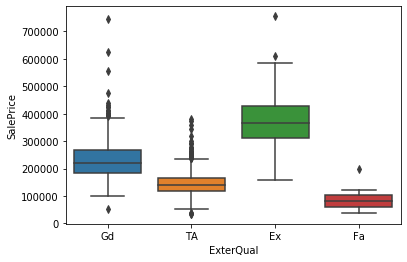

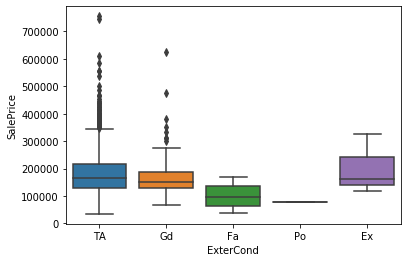

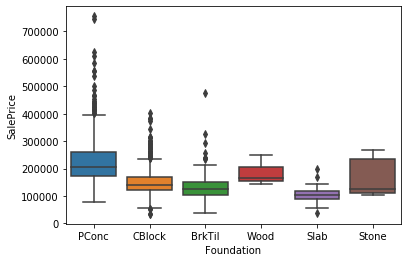

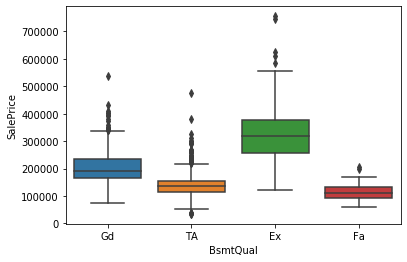

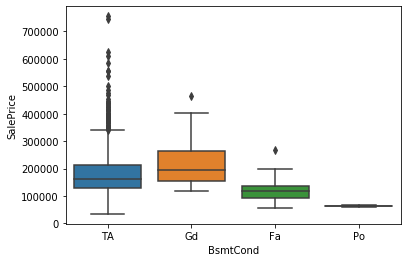

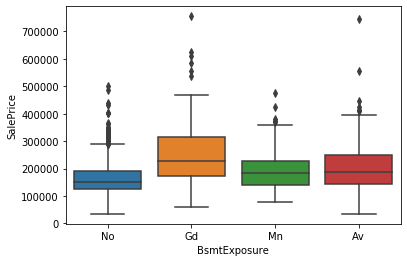

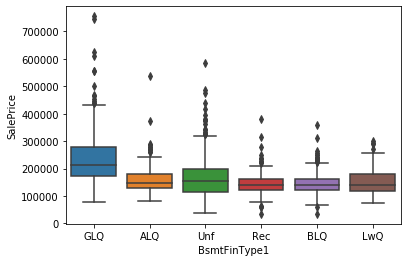

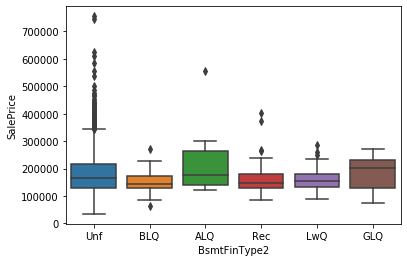

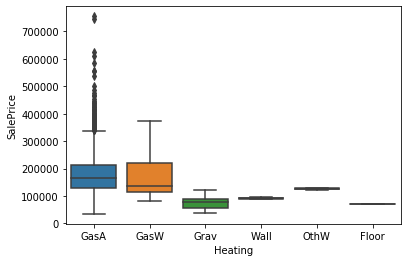

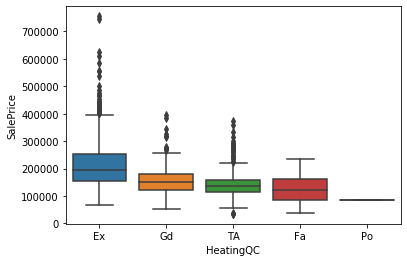

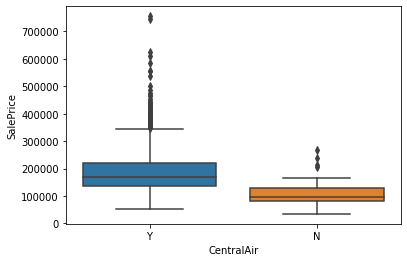

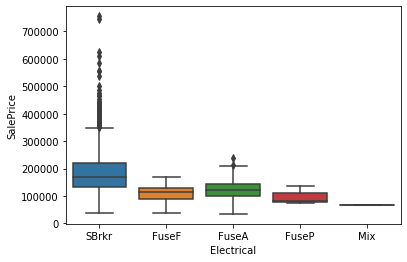

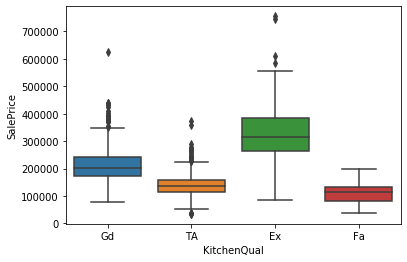

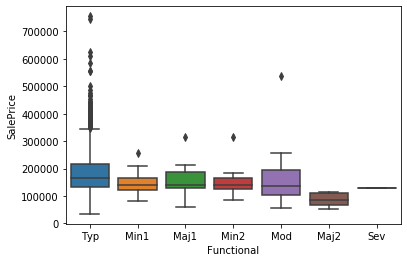

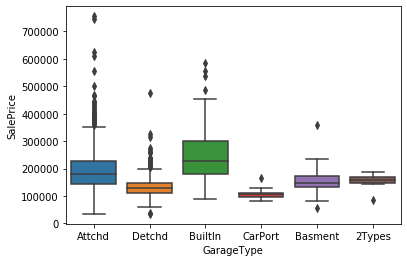

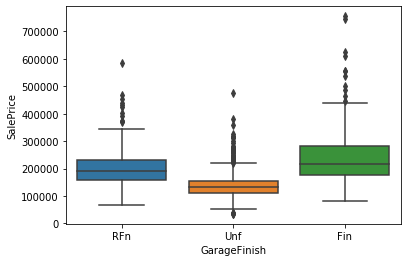

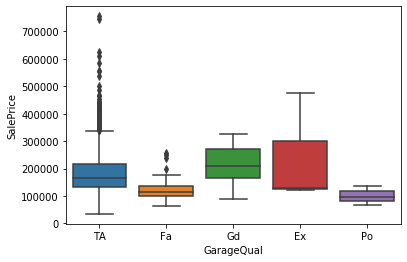

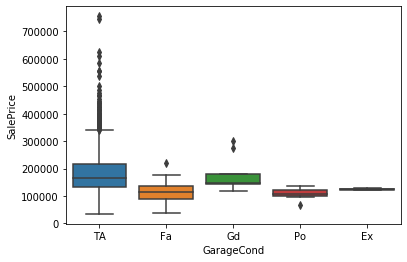

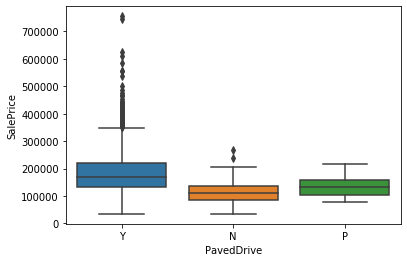

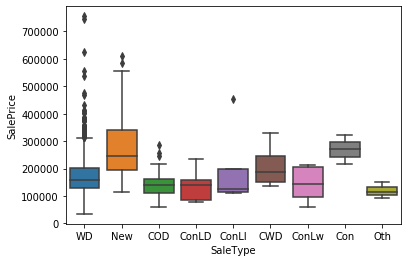

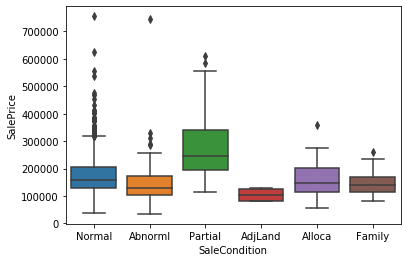

In [25]:
for i in list(df.dtypes[df.dtypes == 'object'].index):
    sns.boxplot(x=i,y='SalePrice',data=df)
    plt.show()

In [26]:
df.shape

(1460, 74)

# Let's do outliear analysis

In [27]:
#after looking scatter plot, we realize that below list may has outliears so we will remove them

outlier_list = ["LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","PoolArea","MiscVal","GrLivArea","GarageArea","3SsnPorch","ScreenPorch","SalePrice","BedroomAbvGr","KitchenAbvGr"]

for col in outlier_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.99)
    IQR = Q3-Q1
    df = df[(df[col] >= (Q1 - (1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))]
    
df.shape

(1441, 74)

In [28]:
#from gragh, we can removed utilities columns
df.drop(['Utilities'],axis='columns',inplace=True)

In [29]:
df.shape

(1441, 73)

In [30]:
##converting ordinal variables to numerical ones

In [31]:
ordinal_variables = ["LotShape","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                    "BsmtFinType2","HeatingQC","KitchenQual","CentralAir","GarageFinish","GarageQual","GarageCond"]

df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [32]:
df[ordinal_variables].head(10)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,CentralAir,GarageFinish,GarageQual,GarageCond
0,3,0,3,2,4,3,1,6,1,4,3,1,2,3,3
1,3,0,2,2,4,3,4,5,1,4,2,1,2,3,3
2,0,0,3,2,4,3,2,6,1,4,3,1,2,3,3
3,0,0,2,2,3,4,1,5,1,3,3,1,1,3,3
4,0,0,3,2,4,3,3,6,1,4,3,1,2,3,3
5,0,0,2,2,4,3,1,6,1,4,2,1,1,3,3
6,3,0,3,2,5,3,3,6,1,4,3,1,2,3,3
7,0,0,2,2,4,3,2,5,4,4,2,1,2,3,3
8,3,0,2,2,3,3,1,1,1,3,2,1,1,2,3
9,3,0,2,2,3,3,1,6,1,4,2,1,2,4,3


In [33]:
##creating dummy variables

In [34]:
nominal_variables = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street']
dummy_columns = pd.get_dummies(df[nominal_variables], drop_first=True)
df = pd.concat([df,dummy_columns], axis="columns")
df.drop(nominal_variables,axis='columns',inplace=True)

In [35]:
df.shape

(1441, 195)

# Model building

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [37]:
# split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

In [38]:
scaler = StandardScaler()
#numerical_cols = ["MSSubClass", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF" , "TotalBsmtSF",
#                 "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
#                 "3SsnPorch","ScreenPorch","MiscVal","SalePrice","house_years","remodel_years","garage_years"]


df_train = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)
df_train.head()

df_test = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
df_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Pave
0,-0.894997,-0.015173,-1.350826,-0.22718,-0.797495,1.298119,-0.282230,1.106133,-0.240523,-0.802393,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
1,-0.894997,-0.451842,0.756964,-0.22718,-0.797495,-0.535804,-0.572457,-0.680697,-0.240523,-0.802393,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
2,-0.647049,-0.787814,0.756964,-0.22718,-1.530288,1.298119,1.765486,-0.680697,-0.240523,-2.270292,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,11.180340,-0.114304,-2.159380,-0.299549,0.063119
3,0.840635,-0.558596,-1.350826,-0.22718,-0.064701,0.381158,1.700991,-0.680697,-0.240523,0.665506,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
4,-0.894997,0.657338,0.756964,-0.22718,-0.064701,-2.369727,0.588453,-0.680697,-0.240523,-2.270292,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119


In [39]:
df_test.describe()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Pave
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,...,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.059572,-0.038739,0.052745,0.000778,0.011455,-0.040263,-0.066837,0.082729,-0.013887,0.085804,...,0.030157,0.044222,0.007311,-0.072696,0.059210,-0.011361,0.028977,-0.021426,0.044917,0.026385
std,1.145173,1.109507,0.967399,1.067103,1.035321,1.058395,0.886759,1.066702,1.014104,0.982335,...,1.246191,1.066396,1.079947,1.077620,1.525508,0.935889,1.119039,1.018962,1.066350,0.764398
min,-0.894997,-1.619131,-1.350826,-0.227180,-3.728669,-4.203649,-0.572457,-2.467527,-3.126797,-2.270292,...,-0.054636,-0.295599,-0.044588,-2.633820,-0.044588,-0.089443,-0.114304,-2.159380,-0.299549,-15.842980
25%,-0.894997,-0.545157,-1.350826,-0.227180,-0.797495,-0.535804,-0.572457,-0.680697,-0.240523,-0.802393,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
50%,-0.151154,-0.171897,0.756964,-0.227180,-0.064701,-0.535804,-0.572457,-0.680697,-0.240523,0.665506,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
75%,0.344740,0.238083,0.756964,-0.227180,0.668093,0.381158,0.136988,1.106133,-0.240523,0.665506,...,-0.054636,-0.295599,-0.044588,0.379677,-0.044588,-0.089443,-0.114304,0.463096,-0.299549,0.063119
max,3.320109,8.917511,0.756964,7.669296,2.866474,3.132042,4.382908,2.892962,5.532025,2.133405,...,18.303005,3.382964,22.427661,0.379677,22.427661,11.180340,8.748626,0.463096,3.338350,0.063119


In [40]:
## Dependent and Independent Variables
y_train = df_train.pop("SalePrice")
X_train = df_train

y_test = df_test.pop("SalePrice")
X_test = df_test

# linear regression

In [41]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9216055042646258
-2.3644280451465776e+20


# Ridge regression

In [42]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9216060567215576
0.8784341599529503


# ridge with k folding method

In [43]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006526,0.000675,0.001598,0.000491,0.001,{'alpha': 0.001},0.810667,0.847132,0.819685,0.879522,...,0.823244,0.040021,5,0.931678,0.927575,0.931450,0.920341,0.931568,0.928522,0.004373
1,0.005807,0.001163,0.001598,0.000489,0.01,{'alpha': 0.01},0.810695,0.847133,0.819725,0.879524,...,0.823264,0.040011,4,0.931678,0.927575,0.931450,0.920341,0.931568,0.928522,0.004373
2,0.005338,0.005451,0.000400,0.000490,1,{'alpha': 1.0},0.813044,0.847372,0.822730,0.879584,...,0.824920,0.039021,3,0.931612,0.927524,0.931395,0.920286,0.931527,0.928469,0.004374
3,0.000000,0.000000,0.000000,0.000000,5,{'alpha': 5.0},0.818685,0.848892,0.827289,0.878900,...,0.828394,0.036577,2,0.931060,0.927135,0.930956,0.919838,0.931092,0.928016,0.004359
4,0.003118,0.006236,0.000000,0.000000,10,{'alpha': 10.0},0.823423,0.850257,0.829843,0.877817,...,0.830873,0.034591,1,0.930404,0.926670,0.930441,0.919309,0.930498,0.927464,0.004332


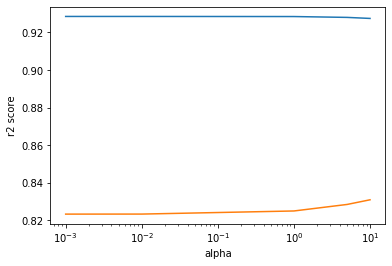

In [45]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [46]:
model_cv.best_params_

{'alpha': 10.0}

In [47]:
# model with optimal alpha
# lasso regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9208505472775572
0.8863788191107157


# linear and ridge regression with RFE

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,25) # Considering 50% of available features
rfe.fit(X_train, y_train)

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

X_train1 = X_train[rfe_sel_columns]
X_test1 = X_test[rfe_sel_columns]

In [49]:
#linear regression
lm = LinearRegression()
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8715990732904464
0.8501686032268269


In [50]:
#ridge regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train1,y_train)

y_train_pred = ridge.predict(X_train1)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test1)
print(r2_score(y_test,y_test_pred))

0.8715990732873111
0.850169007908544


# Lasso Regression after RFE

In [51]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8713707835676202
0.8536053358864661


In [52]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.0),
 ('OverallQual', 0.231),
 ('OverallCond', 0.084),
 ('ExterQual', 0.119),
 ('BsmtQual', 0.105),
 ('BsmtFinSF1', 0.165),
 ('BsmtFinSF2', 0.031),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.099),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.033),
 ('GrLivArea', 0.339),
 ('GarageArea', 0.102),
 ('Neighborhood_NoRidge', 0.076),
 ('Neighborhood_NridgHt', 0.088),
 ('Condition2_PosN', -0.123),
 ('RoofMatl_WdShngl', 0.071),
 ('Exterior1st_CemntBd', -0.064),
 ('Exterior2nd_CmentBd', 0.066),
 ('Heating_GasW', -0.005),
 ('Heating_Grav', -0.001),
 ('Heating_OthW', -0.024),
 ('Heating_Wall', 0.023),
 ('SaleType_New', 0.094),
 ('SaleCondition_Partial', -0.0)]

# lasso with k folding method

In [53]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011996,0.001417,0.001258,0.000388,0.001,{'alpha': 0.001},0.815777,0.817676,0.795511,0.866289,...,0.818981,0.025197,1,0.875436,0.879027,0.883806,0.864282,0.873583,0.875227,0.006490
1,0.002600,0.000490,0.001002,0.000003,0.01,{'alpha': 0.01},0.828490,0.819038,0.799478,0.859640,...,0.818491,0.025389,2,0.873845,0.877227,0.881493,0.862467,0.871115,0.873229,0.006403
2,0.001209,0.000396,0.000801,0.000400,1,{'alpha': 1.0},-0.032230,-0.029148,-0.020640,-0.000711,...,-0.017030,0.013196,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.003126,0.006252,5,{'alpha': 5.0},-0.032230,-0.029148,-0.020640,-0.000711,...,-0.017030,0.013196,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.003125,0.006250,10,{'alpha': 10.0},-0.032230,-0.029148,-0.020640,-0.000711,...,-0.017030,0.013196,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


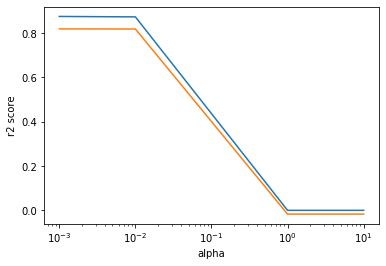

In [55]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [56]:
model_cv.best_params_

{'alpha': 0.001}

In [57]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8713707835676202
0.8536053358864661


In [58]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.0),
 ('OverallQual', 0.231),
 ('OverallCond', 0.084),
 ('ExterQual', 0.119),
 ('BsmtQual', 0.105),
 ('BsmtFinSF1', 0.165),
 ('BsmtFinSF2', 0.031),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.099),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.033),
 ('GrLivArea', 0.339),
 ('GarageArea', 0.102),
 ('Neighborhood_NoRidge', 0.076),
 ('Neighborhood_NridgHt', 0.088),
 ('Condition2_PosN', -0.123),
 ('RoofMatl_WdShngl', 0.071),
 ('Exterior1st_CemntBd', -0.064),
 ('Exterior2nd_CmentBd', 0.066),
 ('Heating_GasW', -0.005),
 ('Heating_Grav', -0.001),
 ('Heating_OthW', -0.024),
 ('Heating_Wall', 0.023),
 ('SaleType_New', 0.094),
 ('SaleCondition_Partial', -0.0)]

In [59]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8713707835676202
0.8536053358864661


In [60]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feature','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False).head(30)


,Feature,Coefficient
12,GrLivArea,0.339
1,OverallQual,0.231
5,BsmtFinSF1,0.165
3,ExterQual,0.119
4,BsmtQual,0.105
13,GarageArea,0.102
8,TotalBsmtSF,0.099
24,SaleType_New,0.094
15,Neighborhood_NridgHt,0.088
2,OverallCond,0.084


In [61]:
lasso_coef[lasso_coef["Coefficient"] != 0].shape

(21, 2)

Subjective Question 1: if we double the value of alpha, what will be the change in model? Let's check.

In [65]:
lm = Lasso(alpha=0.002)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8710904228930105
0.8560525531267705


In [66]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feature','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False).head(30)

,Feature,Coefficient
12,GrLivArea,0.338
1,OverallQual,0.232
5,BsmtFinSF1,0.164
3,ExterQual,0.120
4,BsmtQual,0.105
13,GarageArea,0.102
8,TotalBsmtSF,0.100
24,SaleType_New,0.093
15,Neighborhood_NridgHt,0.087
2,OverallCond,0.083


In [67]:
lasso_coef[lasso_coef["Coefficient"] != 0].shape

(20, 2)

answer of question 1: yes, there is a change in r2 value of train data is slighlty decreased but test data is slightly increased but overall not major change.  
number of variables has also changed but the coeffienct has no change since the regulazation has the absolute summation of coeffiencts of the features.

# Ridge regression with RFE

In [68]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train1,y_train)

y_train_pred = ridge.predict(X_train1)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test1)
print(r2_score(y_test,y_test_pred))

0.8715988014133406
0.8502880611958044


# Ridge regression with RFE and k fold

In [69]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002192,0.000224,0.000989,0.000028,0.001,{'alpha': 0.001},0.814030,0.817354,0.791356,0.868543,...,0.817922,0.027084,5,0.875591,0.879213,0.884130,0.864490,0.873729,0.875430,0.006521
1,0.002000,0.000633,0.001002,0.000632,0.01,{'alpha': 0.01},0.814034,0.817355,0.791369,0.868542,...,0.817927,0.027080,4,0.875591,0.879213,0.884130,0.864490,0.873729,0.875430,0.006521
2,0.002799,0.001166,0.000801,0.000401,1,{'alpha': 1.0},0.814474,0.817479,0.792526,0.868432,...,0.818400,0.026690,3,0.875587,0.879210,0.884113,0.864486,0.873722,0.875424,0.006517
3,0.001800,0.000400,0.001001,0.000002,5,{'alpha': 5.0},0.816174,0.817971,0.794777,0.868018,...,0.819582,0.025776,2,0.875533,0.879158,0.883937,0.864437,0.873619,0.875337,0.006486
4,0.001603,0.000493,0.000997,0.000007,10,{'alpha': 10.0},0.818166,0.818564,0.795907,0.867534,...,0.820456,0.025157,1,0.875435,0.879062,0.883721,0.864345,0.873458,0.875204,0.006457


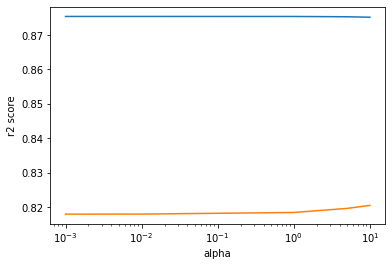

In [71]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [72]:
model_cv.best_params_

{'alpha': 10.0}

In [73]:
# model with optimal alpha
# ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.871473053608503
0.852868745368521


In [74]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef.columns = ['Feature','Coefficient']
ridge_coef.sort_values(by='Coefficient',ascending=False).head(30)

,Feature,Coefficient
1,OverallQual,0.228
12,GrLivArea,0.187
5,BsmtFinSF1,0.137
10,2ndFlrSF,0.129
8,TotalBsmtSF,0.126
3,ExterQual,0.120
24,SaleType_New,0.115
9,1stFlrSF,0.110
4,BsmtQual,0.106
13,GarageArea,0.102


In [75]:
ridge_coef[ridge_coef["Coefficient"] != 0].shape

(25, 2)

Subjective Question 1: if we double the value of alpha, what will be the change in model? Let's check.

In [77]:
# ridge regression
lm = Ridge(alpha=20)
lm.fit(X_train1, y_train)

# predict
y_train_pred = lm.predict(X_train1)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test1)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.871307552559561
0.8543328475466883


In [78]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef.columns = ['Feature','Coefficient']
ridge_coef.sort_values(by='Coefficient',ascending=False).head(30)

,Feature,Coefficient
1,OverallQual,0.226
12,GrLivArea,0.187
5,BsmtFinSF1,0.136
10,2ndFlrSF,0.128
8,TotalBsmtSF,0.125
3,ExterQual,0.121
9,1stFlrSF,0.110
4,BsmtQual,0.106
13,GarageArea,0.103
24,SaleType_New,0.094


Answer to sebjective question 1: yes, there is the change in r2 values. r2 value train data is slightly decreased but test data
is slightly increased but overall not major change. . no of feature variable has not changed but their co-efficient  are changed because the regularization is the sum of the squared of the co-efficient of the features.    

Lasso regression with alpha 0.001 and r2 values of train and test data are below with 23 variables with k folding and RFE.

Model --> Lasso Regression with RFE selection and k folding method
Variable --> 21
train --> 0.8713707835676202
test --> 0.8536053358864661

Model --> Ridge Regression with RFE selection and k folding method
Variable --> 25
train --> 0.871473053608503
test --> 0.852868745368521

Lasso has less variables so my final model would be Lasso regression with 25 RFE feature selection 
and also using k fold method. 